# Gaussian Formula

$$
f(x)= a e^{-\left(\frac{(x-b)^2}{2c^2})\right)}
$$
where for our purposes, $b=0$

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## confirm Gauss Function

In [2]:
def gauss(x, a=1, b=0, c=1):
    expnt = -((x-b)**2)/(2*c**2)
    return a*np.exp(expnt)

In [3]:
from scipy.stats import norm

Need normalization factor of $\frac{1}{\sqrt{2\pi}}$

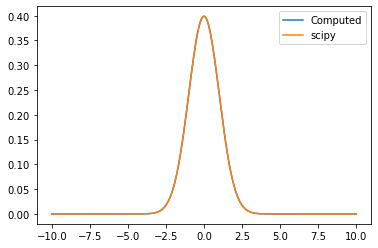

In [4]:
x = np.linspace(-10, 10, 1000)
y = gauss(x, a=np.sqrt(1/(2*np.pi)))
xnorm = norm.pdf(x)

fig, ax = plt.subplots()
ax.plot(x,y, label='Computed')
ax.plot(x, xnorm, label='scipy')
ax.legend()

In [5]:
np.allclose(y, xnorm)

True

gauss function appears to produce same result as `scipy.random.normal.pdf`

Text(0.5, 1.0, 'Width Parameter c')

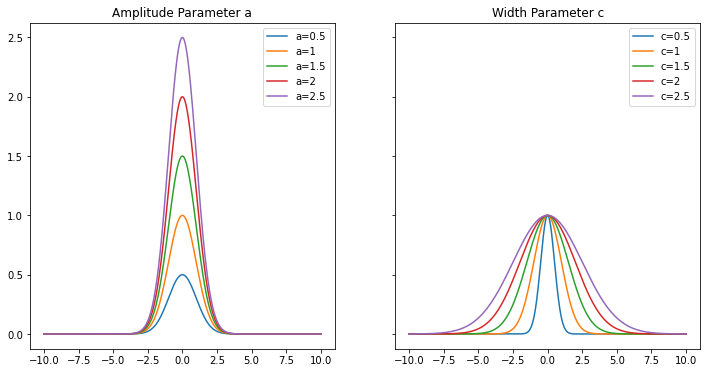

In [6]:
fig = plt.figure(figsize=(12,6))

axs = fig.subplots( 1,2, sharey=True)
ax = axs[0]
for a in [0.5, 1, 1.5, 2, 2.5]:
    ax.plot(x, gauss(x, a=a), label=f'a={a}')
ax.legend()
ax.set_title('Amplitude Parameter a')

ax =axs[1]
for c in [0.5, 1, 1.5, 2, 2.5]:
    ax.plot(x, gauss(x,c=c ), label=f'c={c}')
ax.legend()
ax.set_title('Width Parameter c')

## Full Width Half Maximum (FWHM)

$$ 
FWHM = 2\sqrt{2 ln 2}\ c \approx 2.35482\ c
$$
Formula above computes the width, we need the x-distance so half of that value.

(http://hyperphysics.phy-astr.gsu.edu/hbase/Math/gaufcn2.html)

Text(0.5, 1.0, 'Full Width, Half Maximum')

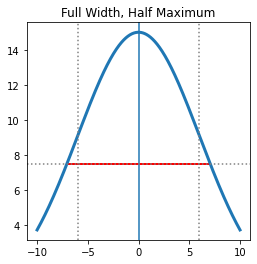

In [7]:
a=15
c= 6.0
#fwhm = 2.35482*c
fwhm = 1.18*c
mx = gauss(fwhm, a=a, c=c)

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111)

ax.plot(x, gauss(x,a=a, c=c ), lw=3,label=f'c={c}')
ax.axvline(0)
ax.axhline(a*0.5, ls=':', color='grey')
ax.axvline(-c, ls=':', color='grey')
ax.axvline(c, ls=':', color='grey')
ax.hlines(y=mx, xmin=-fwhm, xmax=fwhm, lw=2, color='red')
ax.set_title('Full Width, Half Maximum')

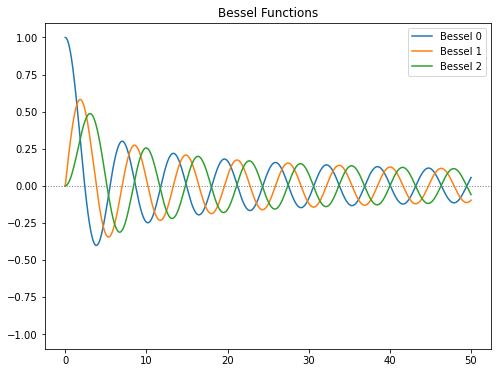

In [83]:
import scipy.special as sp

x = np.linspace(0, 50, 1500)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(x, sp.jv(0,x), label='Bessel 0')
ax.plot(x, sp.jv(1,x), label='Bessel 1')
ax.plot(x, sp.jv(2,x), label='Bessel 2')
ax.axhline(0, ls=':',lw=1, color='grey')
ax.set_ylim(-1.1, 1.1)
ax.set_title('Bessel Functions')
ax.legend()

Text(0.5, 1.0, '$I=I_0\\left(\\frac{2J_1(x)}{x}\\right)^2$')

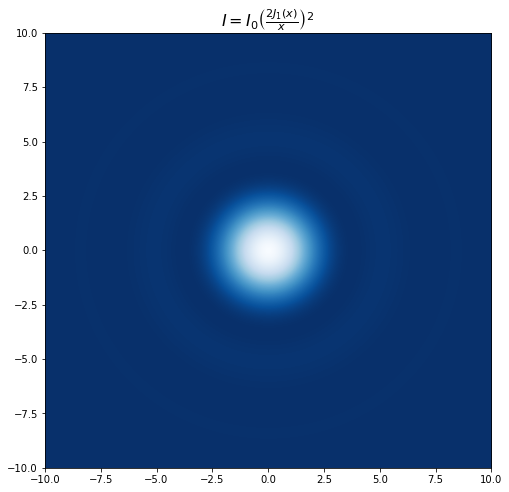

In [118]:
I0 = 888

x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)

XX, YY = np.meshgrid(x,y)
dist = np.sqrt(XX**2+YY**2)
bessel = sp.jv(1, dist)

funcstr = r'$I=I_0\left(\frac{2J_1(x)}{x}\right)^2$'

#I=bessel
I = I0*np.power((2*bessel/(dist)),2)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.imshow(I, origin='lower', cmap=plt.cm.Blues_r,
           extent=[x.min(),x.max(),y.min(),y.max()], aspect='auto')
ax.set_title(funcstr,size=16)

In [96]:
I.min(),I.max()

(2.13995403273331e-12, 4.998996071967335)

Text(0.5, 1.0, '$I=I_0\\left(\\frac{2J_1(x)}{x}\\right)^2$')

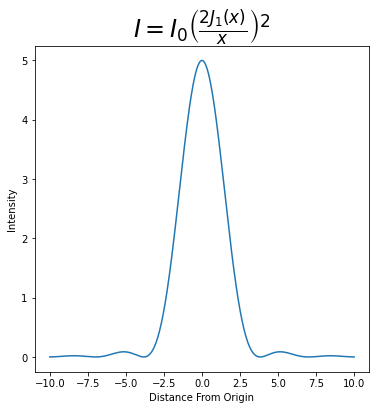

In [110]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.plot(x,I[250])
ax.set_xlabel('Distance From Origin')
ax.set_ylabel('Intensity')
ax.set_title(funcstr,size=24)

# ax = fig.add_subplot(122)
# plt.plot(x, dist[250])
# ax.set_xlabel('Distance From Origin')
# ax.set_ylabel('Disntace (pixels)')

Text(0.5, 0.92, '$I=I_0\\left(\\frac{2J_1(x)}{x}\\right)^2$')

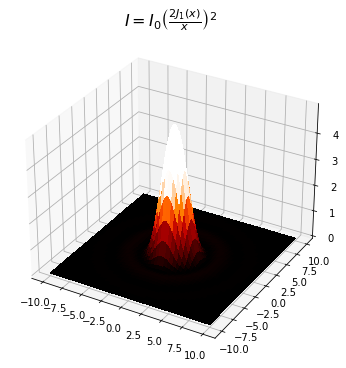

In [114]:
# fig = plt.figure(figsize=(6,6))
# ax = fig.add_subplot(111)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(6,6))
ax.plot_surface(XX,YY, I, antialiased=False, cmap=plt.cm.gist_heat, vmin=0, vmax=3)
ax.set_title(funcstr,size=16)

In [37]:
np.log(0)

C:\Users\Kevin\AppData\Local\Temp/ipykernel_27632/2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

Text(0.5, 1.0, '$I=I_0\\left(\\frac{2J_1(x)}{x}\\right)^2$')

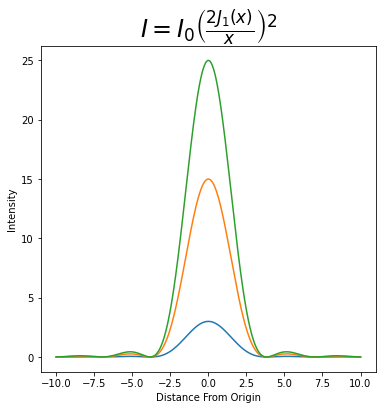

In [120]:
dist = x
bessel = sp.jv(1, dist)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.plot(x,3.0*np.power((2*bessel/(dist)),2))
plt.plot(x,15.0*np.power((2*bessel/(dist)),2))
plt.plot(x,25.0*np.power((2*bessel/(dist)),2))
ax.set_xlabel('Distance From Origin')
ax.set_ylabel('Intensity')
ax.set_title(funcstr,size=24)